In [90]:
import numpy as np
import pandas as pd

In [91]:
data = pd.read_csv("C:\\Users\\mahdi\\Desktop\\bridge\\DLT6_0x9_sweep.csv")

In [92]:
freqs = np.ravel(data[["freq"]].to_numpy())
amps = np.ravel(data[["amp"]].to_numpy())

In [93]:
import matplotlib.pyplot as plt

In [94]:
import scipy.signal as signal
import numpy.polynomial as poly

height=2.4256410256V
bandwidth=259Hz
f0=9333.0
Q=36.034749034749034


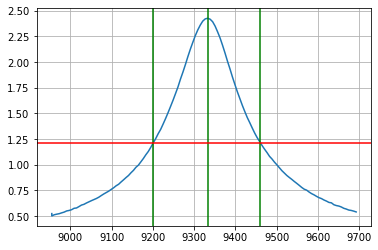

In [104]:
plt.plot(freqs, amps)
plt.grid()
fh = 9459
fl = 9200
#fh = 9403
#fl = 9258
#fh = 8110
#fl = 7965
plt.axvline(x=fh, color='g')
plt.axvline(x=fl, color='g')
peaks, properties = signal.find_peaks(amps, height=(1.7, None))
height = properties['peak_heights'][0]
f0 = freqs[peaks[0]]
plt.axvline(x=f0, color='g')
#plt.axhline(y=height*10**(-3/20), color='r')
plt.axhline(y=height*0.5, color='r')
BW = (fh-fl)
Q = f0 / BW
print(f'height={height}V')
print(f'bandwidth={BW}Hz')
print(f'f0={f0}')
print(f'Q={Q}')

0.006409301746357105

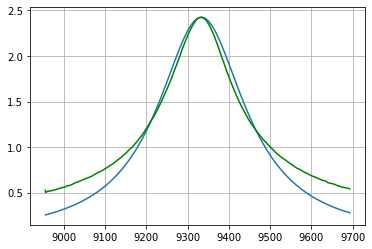

In [109]:
freqs = np.ravel(data[["freq"]].to_numpy())
x = freqs
w = BW
x0 = f0
lor = 0.5 * w / np.pi / ((x - x0)**2 + (0.5 * w)**2)
lormax = 2 / np.pi / w

amps = np.ravel(data[["amp"]].to_numpy())

scaling = height / lormax
plt.figure()
lor *= scaling
plt.plot(freqs, lor)
plt.plot(freqs, amps, color='g')
plt.grid()

# get the mse within the bandwidth to be less than a certain value to accept the width
mask = np.ma.masked_inside(freqs, fl, fh)
BWdata = amps[mask.mask]

mse = np.mean((amps[mask.mask] - lor[mask.mask])**2)
mse

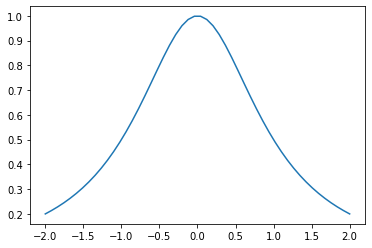

In [97]:
x = np.linspace(-2, 2, 50)
w = 2
x0 = 0
lor = 0.5 * w / ((x - x0)**2 + (0.5 * w)**2)
lormax = 2 / np.pi / w

plt.figure()
plt.plot(x, lor)